In [1]:
import numpy as np
from scipy.stats import zscore

In [2]:
data = np.genfromtxt("dataZeroSure.csv", delimiter=',')[1:, 1:]
print(data[:10])
print(np.shape(data))

[[  1.           1.           3.79026967  12.          -7.5       ]
 [  1.           1.           2.00377995  10.         -15.        ]
 [  1.           0.           3.99346406   2.          -3.        ]
 [  1.           0.           4.90844364  10.         -12.5       ]
 [  1.           1.           1.06464404  12.          -3.75      ]
 [  1.           0.           1.86680253  12.         -24.        ]
 [  1.           1.           1.53919871   6.          -4.5       ]
 [  1.           1.           1.06368711  10.          -4.38      ]
 [  1.           1.           2.10096695   4.          -3.5       ]
 [  1.           1.           1.27326566  10.          -6.25      ]]
(8736, 5)


In [3]:
# remove all trials less than 250 ms and greater than 10.5 s
trialsMoreThan250ms = data[data[:, 2] > 0.25]
trialsLessThan10_5s = trialsMoreThan250ms[trialsMoreThan250ms[:, 2] < 10.5]
print(np.shape(trialsLessThan10_5s))
trialsLessThan10_5s

(8671, 5)


array([[  1.        ,   1.        ,   3.79026967,  12.        ,
         -7.5       ],
       [  1.        ,   1.        ,   2.00377995,  10.        ,
        -15.        ],
       [  1.        ,   0.        ,   3.99346406,   2.        ,
         -3.        ],
       ...,
       [ 39.        ,   0.        ,   0.91683251,   4.        ,
         -3.5       ],
       [ 39.        ,   1.        ,   1.07779575,   5.        ,
         -3.13      ],
       [ 39.        ,   0.        ,   1.88081138,   9.        ,
         -7.88      ]])

In [4]:
def getTrials(gain, loss, choice):
    trialsGain = trialsLessThan10_5s[trialsLessThan10_5s[:, 3] == gain]
    trialsLoss = trialsGain[trialsGain[:, 4] == loss]
    trialsChoice = trialsLoss[trialsLoss[:, 1] == choice]
    
    return trialsChoice

In [5]:
def getCleanedTrialsZScore(gain, loss, choice):
    print(gain, loss, choice)
    trials = getTrials(gain, loss, choice)
    reactionTimes = trials[:, 2]
    zScores = np.abs(zscore(reactionTimes))
    cleanedTrials = trials[zScores < 3]
    
    return cleanedTrials
    
allStakes = np.unique(data[:, -2:], axis=0)

allZScoreCleanedTrials = [getCleanedTrialsZScore(*stakes, choice) for stakes in allStakes for choice in range(0, 2)]
allZScoreCleanedTrialsArray = np.vstack(allZScoreCleanedTrials)
print(np.shape(allZScoreCleanedTrialsArray))

2.0 -4.0 0
2.0 -4.0 1
2.0 -3.5 0
2.0 -3.5 1
2.0 -3.0 0
2.0 -3.0 1
2.0 -2.5 0
2.0 -2.5 1
2.0 -2.0 0
2.0 -2.0 1
2.0 -1.75 0
2.0 -1.75 1
2.0 -1.5 0
2.0 -1.5 1
2.0 -1.25 0
2.0 -1.25 1
2.0 -1.0 0
2.0 -1.0 1
2.0 -0.88 0
2.0 -0.88 1
2.0 -0.75 0
2.0 -0.75 1
2.0 -0.63 0
2.0 -0.63 1
2.0 -0.5 0
2.0 -0.5 1
2.0 -0.38 0
2.0 -0.38 1
4.0 -8.0 0
4.0 -8.0 1
4.0 -7.0 0
4.0 -7.0 1
4.0 -6.0 0
4.0 -6.0 1
4.0 -5.0 0
4.0 -5.0 1
4.0 -4.0 0
4.0 -4.0 1
4.0 -3.5 0
4.0 -3.5 1
4.0 -3.0 0
4.0 -3.0 1
4.0 -2.5 0
4.0 -2.5 1
4.0 -2.0 0
4.0 -2.0 1
4.0 -1.75 0
4.0 -1.75 1
4.0 -1.5 0
4.0 -1.5 1
4.0 -1.25 0
4.0 -1.25 1
4.0 -1.0 0
4.0 -1.0 1
4.0 -0.75 0
4.0 -0.75 1
5.0 -10.0 0
5.0 -10.0 1
5.0 -8.75 0
5.0 -8.75 1
5.0 -7.5 0
5.0 -7.5 1
5.0 -6.25 0
5.0 -6.25 1
5.0 -5.0 0
5.0 -5.0 1
5.0 -4.38 0
5.0 -4.38 1
5.0 -3.75 0
5.0 -3.75 1
5.0 -3.13 0
5.0 -3.13 1
5.0 -2.5 0
5.0 -2.5 1
5.0 -2.19 0
5.0 -2.19 1
5.0 -1.88 0
5.0 -1.88 1
5.0 -1.56 0
5.0 -1.56 1
5.0 -1.25 0
5.0 -1.25 1
5.0 -0.94 0
5.0 -0.94 1
6.0 -12.0 0
6.0 -12.0 1
6.0 -10.5 0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:2309: RuntimeWarning: Mean of empty slice.
  mns = a.mean(axis=axis)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Pyt

10.0 -6.25 0
10.0 -6.25 1
10.0 -5.0 0
10.0 -5.0 1
10.0 -4.38 0
10.0 -4.38 1
10.0 -3.75 0
10.0 -3.75 1
10.0 -3.13 0
10.0 -3.13 1
10.0 -2.5 0
10.0 -2.5 1
10.0 -1.88 0
10.0 -1.88 1
12.0 -24.0 0
12.0 -24.0 1
12.0 -21.0 0
12.0 -21.0 1
12.0 -18.0 0
12.0 -18.0 1
12.0 -15.0 0
12.0 -15.0 1
12.0 -12.0 0
12.0 -12.0 1
12.0 -10.5 0
12.0 -10.5 1
12.0 -9.0 0
12.0 -9.0 1
12.0 -7.5 0
12.0 -7.5 1
12.0 -6.0 0
12.0 -6.0 1
12.0 -5.25 0
12.0 -5.25 1
12.0 -4.5 0
12.0 -4.5 1
12.0 -3.75 0
12.0 -3.75 1
12.0 -3.0 0
12.0 -3.0 1
12.0 -2.25 0
12.0 -2.25 1
(8438, 5)


In [6]:
allZScoreCleanedTrialsArray[:10, :]

array([[ 1.        ,  0.        ,  1.41810656,  2.        , -4.        ],
       [ 1.        ,  0.        ,  1.11064412,  2.        , -4.        ],
       [ 2.        ,  0.        ,  1.69580287,  2.        , -4.        ],
       [ 2.        ,  0.        ,  0.69828725,  2.        , -4.        ],
       [ 3.        ,  0.        ,  0.70951678,  2.        , -4.        ],
       [ 3.        ,  0.        ,  0.72639418,  2.        , -4.        ],
       [ 4.        ,  0.        ,  1.04201617,  2.        , -4.        ],
       [ 4.        ,  0.        ,  0.70147738,  2.        , -4.        ],
       [ 5.        ,  0.        ,  1.24876051,  2.        , -4.        ],
       [ 5.        ,  0.        ,  0.77599342,  2.        , -4.        ]])

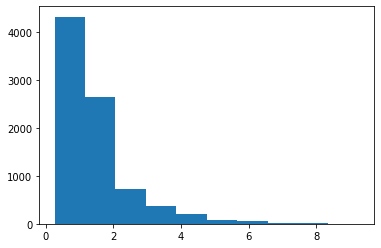

In [8]:
from matplotlib import pyplot as plt
plt.hist(allZScoreCleanedTrialsArray[:, 2].flatten())
plt.show()

In [9]:
np.savetxt("dataZeroSure_cleaned_250_10500_zScore3.csv", allZScoreCleanedTrialsArray, delimiter=",")